# README 
This notebook illustrates how the code works on top level

First, install the necessary modules
Run the following command in your terminal:

```
pip install -r requirements.txt
```

Now import the necessary modules for this notebook

In [1]:
from classes import MKID
import functions as f

%matplotlib widget

Initiate the MKID object

In [2]:
light_dir = "./LT192Chip1_BF_20220235/1KIDs laser on 1545 50nW 46dB/TD_Power"  # directory for the pulsedata
dark_dir = './LT192Chip1_BF_20220235/1KIDs laser off/TD_Power'  # directory for the noise data
LT = 192                # LT number of the chip. This is just for saving purposes
wavelength = 1545       # wavelenght of the laser. This is just for saving purposes
kid_nr = 1              # KID number
pread = 102             # readout power of the KID
comment = '20220235'    # the date of the experiment or any other comment you want to add for saving the figures
chuncksize = 40         # the number of binfiles that the code will analyse at once. The script will concatenate these files and analyze them at once istead of analyzing every file on its own
LT192_KID1_P102 = MKID(LT, wavelength, light_dir, dark_dir, kid_nr, pread, comment, chuncksize)

40 files obtained, chunckwise peakmodel is False with chuncksize=40


Set the pules analysis settings 

In [3]:
mkid = LT192_KID1_P102      # choose the object you want to analyze
settings = {                # Choose the best settings for the pulse analysis:
    'sf':1e6,                   # sample frequency of the data. It is 1e6 Hz normally, except for the TDmed files where it is 5e4 Hz.
    'coord':'smith',            # coordinates system: 'circle' or 'smith'
    'response':'X',             # response type: 'amp' or 'phase' when in 'circle' coordinates, 'R' or 'X' when in 'smith' coordinates
    'pw':64,                    # pulsewindow, a window must be chosen that doesn't cut off your pulses, but choosing it too wide will cause pulsewindows to overlap
    'sw':5,                     # smoothingwindow, the windowsize used for smoothing the data
    'window':'box',             # window type for smoothing the data, only a simple 'box' works at the moment
    'ssf':4,                    # supersample factor, ssf this will increase the number of point in the data such that the rising edge can be found more accurately
    'buffer':0.25,              # the buffer is added at both sides of the pulsewindpow when cutting a pulse from the data, it is given as a ratio of the pulsewindow: 0<buffer<1. A buffer is needed because some extra room is required to align after they have been cut from the data
    'mph':0.15,                  # minimal pulse height, together with mpp these are the two criteria that are used to select the pulses. For more  https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html 
    'mpp':0.15,                  # minimal pulse prominence, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html 
    'noise_mph':0.15,            # minimal pulse height for noise data
    'noise_mpp':0.15,            # minimal pulse prominence for noise data
    'nr_noise_segments':100,    # number of noise segment to be used for the noise model
    'binsize':0.03,             # the binsize for the pulseheight histogram
    'range':None,               # range of pulseheights to consider for the resolving power
    'fit_T':[55, 70],           # the pulse fitting range given in time for finding the decay time
    'max_bw':100000,            # maximum bandwidth: the number of points used for the noise spectrum. The noise spectrum has a larger bandwidth than noise model as the noise model uses segments as long as the pulsewindow.
    'tlim':[0, 1],              # the time limits for the timestream response plots
    'filter_std':5,             # the number of standard deviations used for filtering the pulses. Pulses are filtered that are outside this number of stds at any point along their pulsewindow
    'rise_offset':0.1           # part of pulsewindow that comes before the pulse rise, 0<rise_offset<1, 
    } 

Do an initial check if the chosen settings are suitable

N_det = 3783, N_sel = 3215 (=85 perc: -2 perc. too close, -13 perc. outliers)


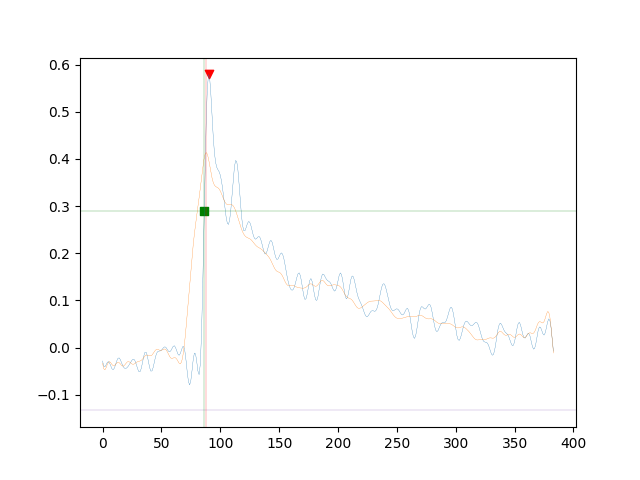

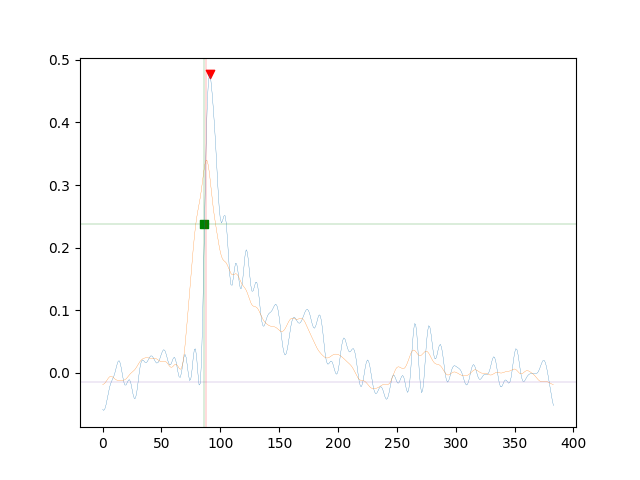

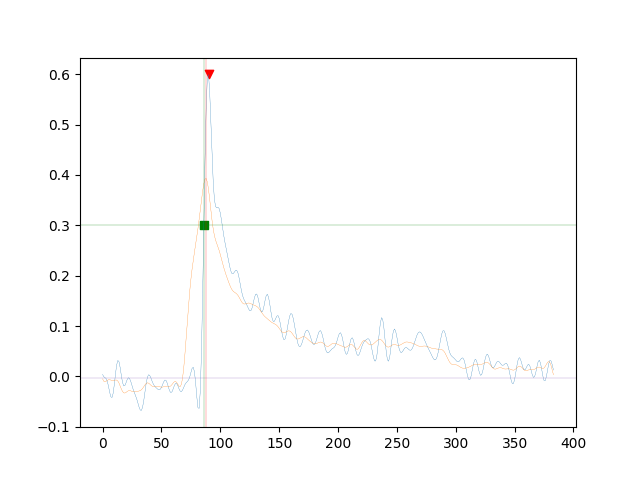

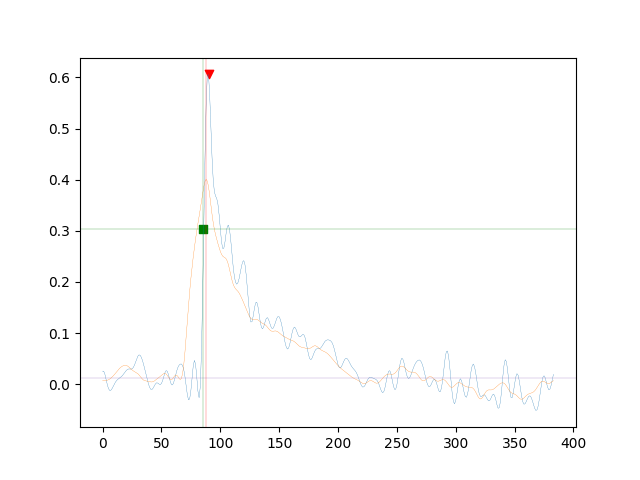

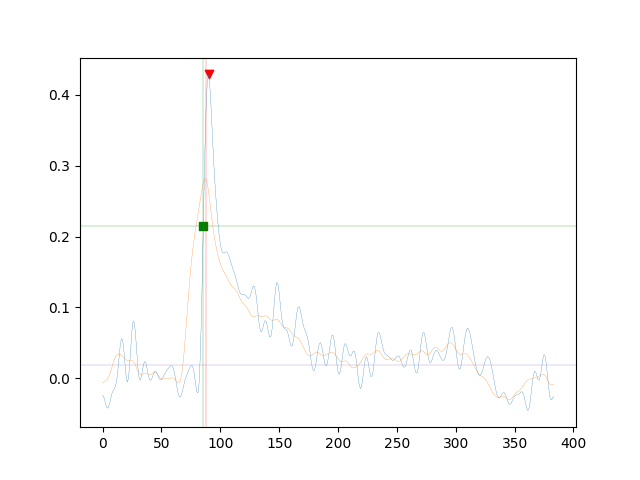

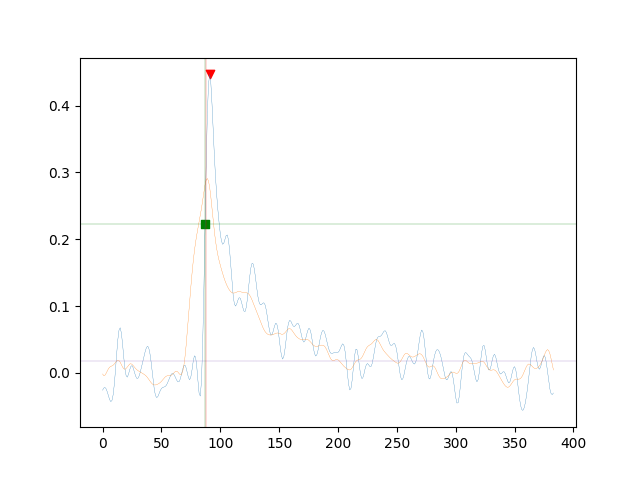

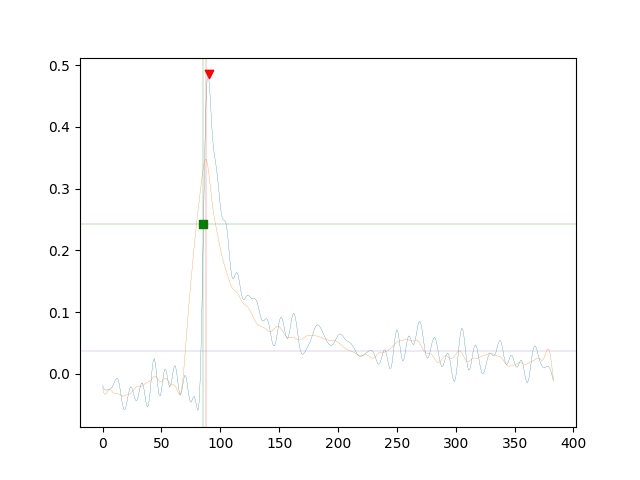

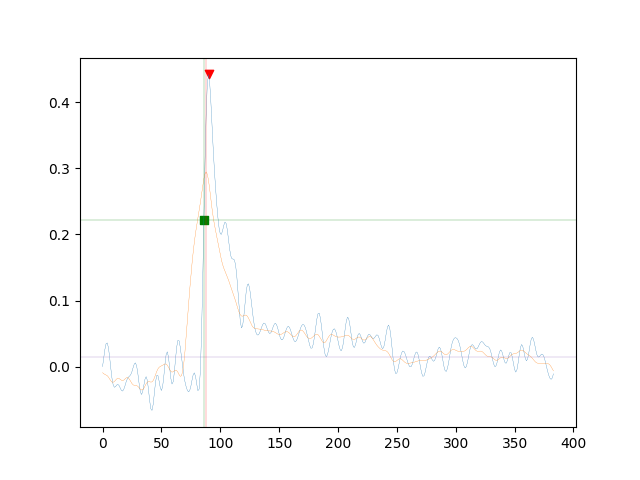

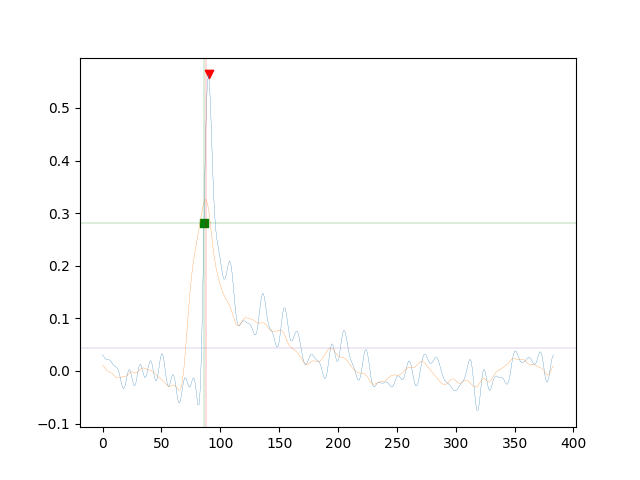

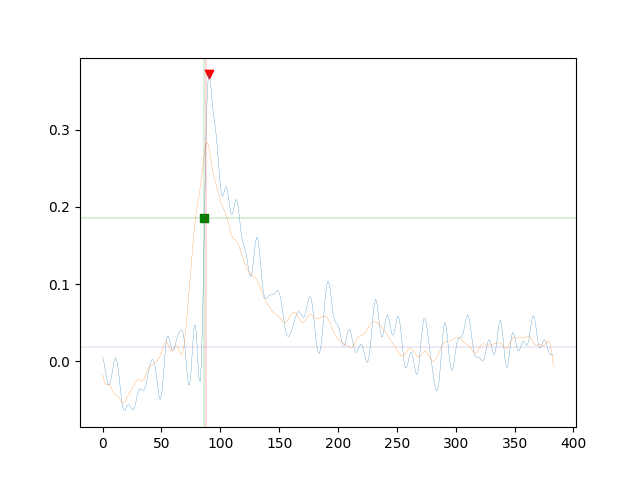

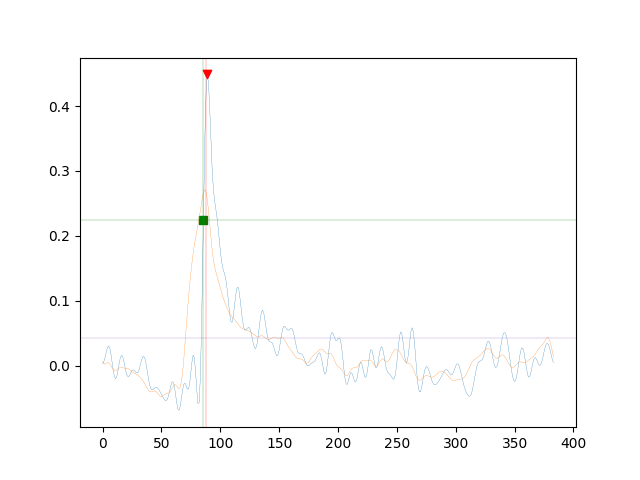

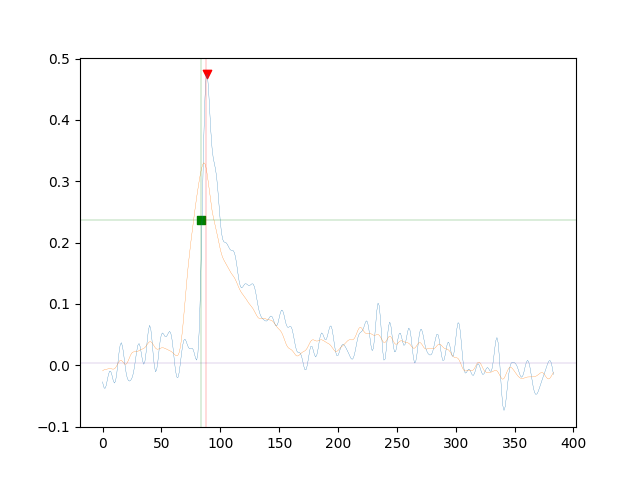

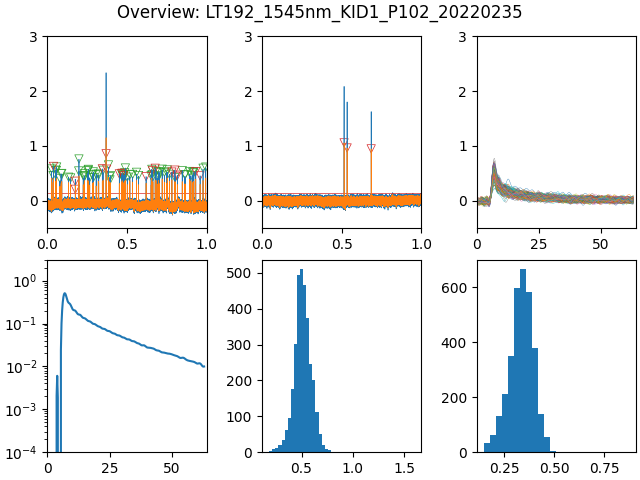

In [4]:
# the mkid.initiate attribute is for quickly checking how the pulse selection and alignment is going. It will only analyze one chunck of binfiles that was set by the initiation of the object.
mkid.initiate(
    settings,               # input the pulse analysis settings
    f,                      # provide the required file with all the functions
    binsize=0.1,            # the binsize of the pulseheight histogram, this should actually be automated
    dpulse=10,              # overlaying all the pulses might be too much, only one in every ... is plotted
    plot_pulse=True,        # if True, this will plot an individual detected pulse with its pulse height and the location of its rising edge at half the pulse maximum
    every=300,              # this gives the plotting frequency of the individual pulses, one in every ... will be plotted
    below=None            # only plot detected pulses below a certain pulse height. You can use this to check if these are arising from noise or not.
    )

Do the complete pulse analysis

N_det = 3783, N_sel = 3215 (=85 perc: -2 perc. too close, -13 perc. outliers)
N_det = 52, N_sel = 45 (=87 perc: -0 perc. too close, -13 perc. outliers)


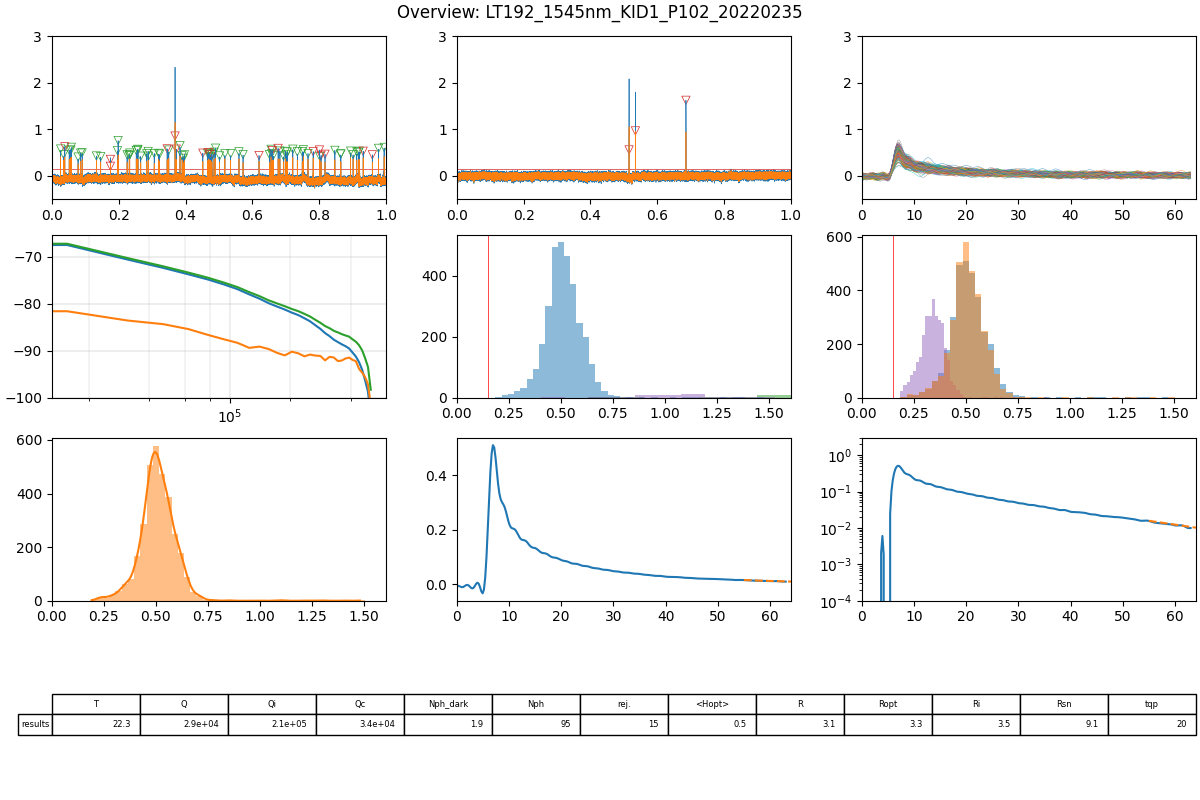

In [5]:
# the mkid.overview attribute does the full pulse analysis and provides an overview plot of all the relevant parameters
mkid.overview(
    settings,                       # input the pulse analysis settings
    f,                              # provide the required file with all the functions
    redo_peak_model=False,          # if you don't want to redo the pulse analysis but do want to renew the plot set this setting to False
    save=False,                      # if you want to save the figure and data, set it to True. It will create 4 files, a text file with the settings, a pickle file with the pulse data and a png and svg of file of the figure 
    figpath='./Results/'            # provide the directory to which the figure will be saved
    )